In [57]:
#loading Dataset
import pandas as pd
df = pd.read_excel('glass.xlsx', sheet_name='glass')
print(df.shape)
print(df.columns.tolist())
df.head(3)

(214, 10)
['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [3]:
#Data preprocessing
print(df['Type'].value_counts().sort_index())
print(df.isnull().sum())

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


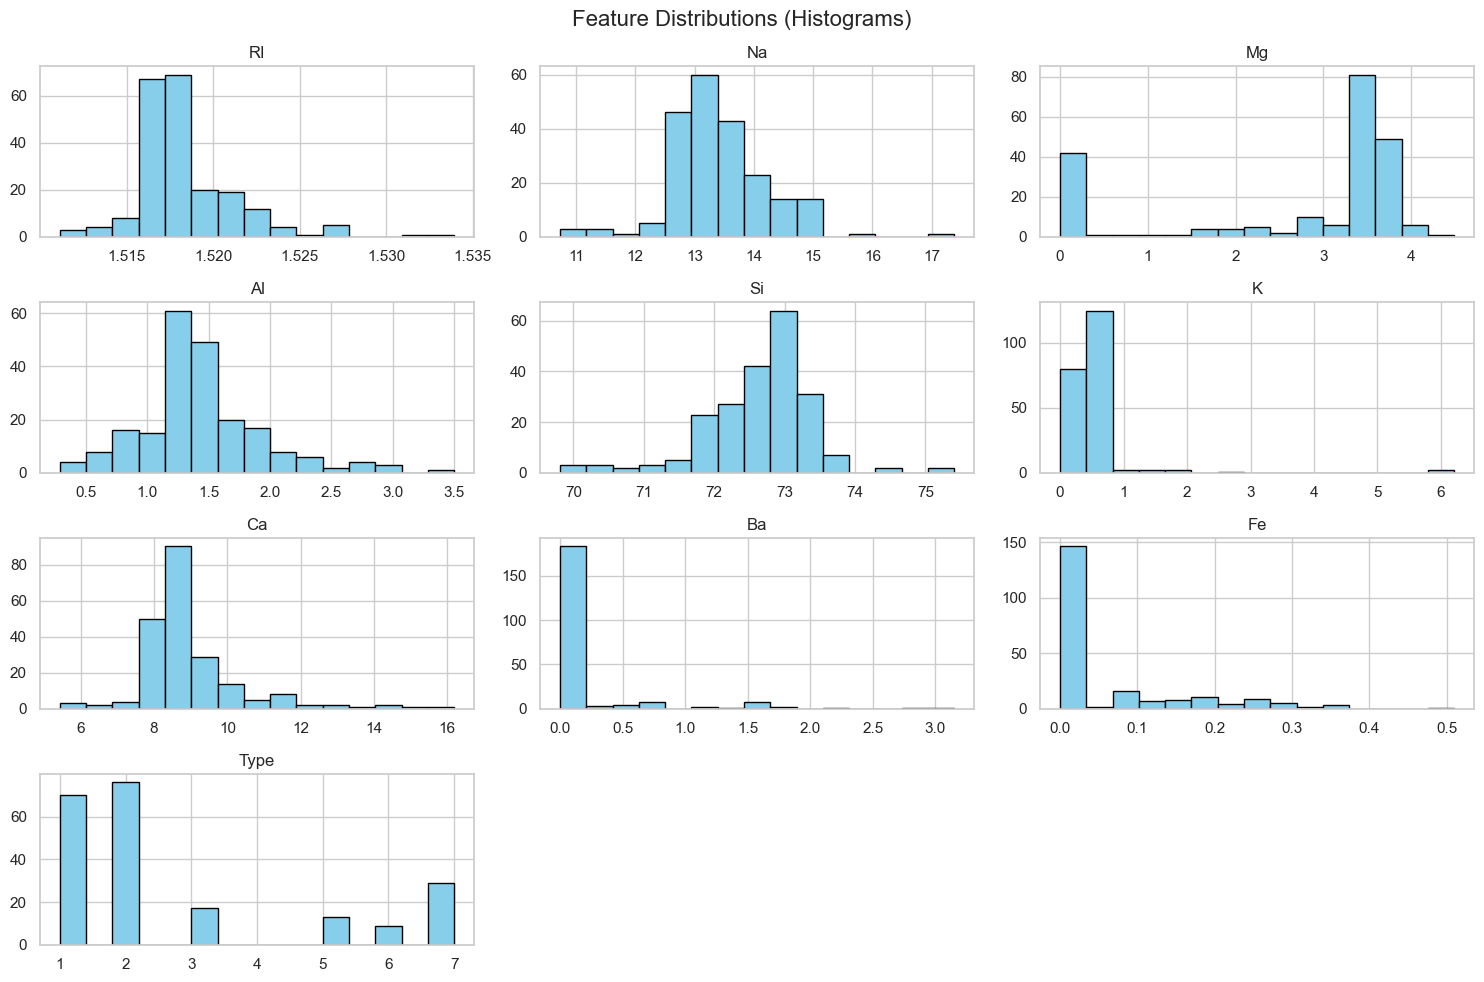

In [5]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot histograms for all numerical features
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions (Histograms)", fontsize=16)
plt.tight_layout()
plt.show()


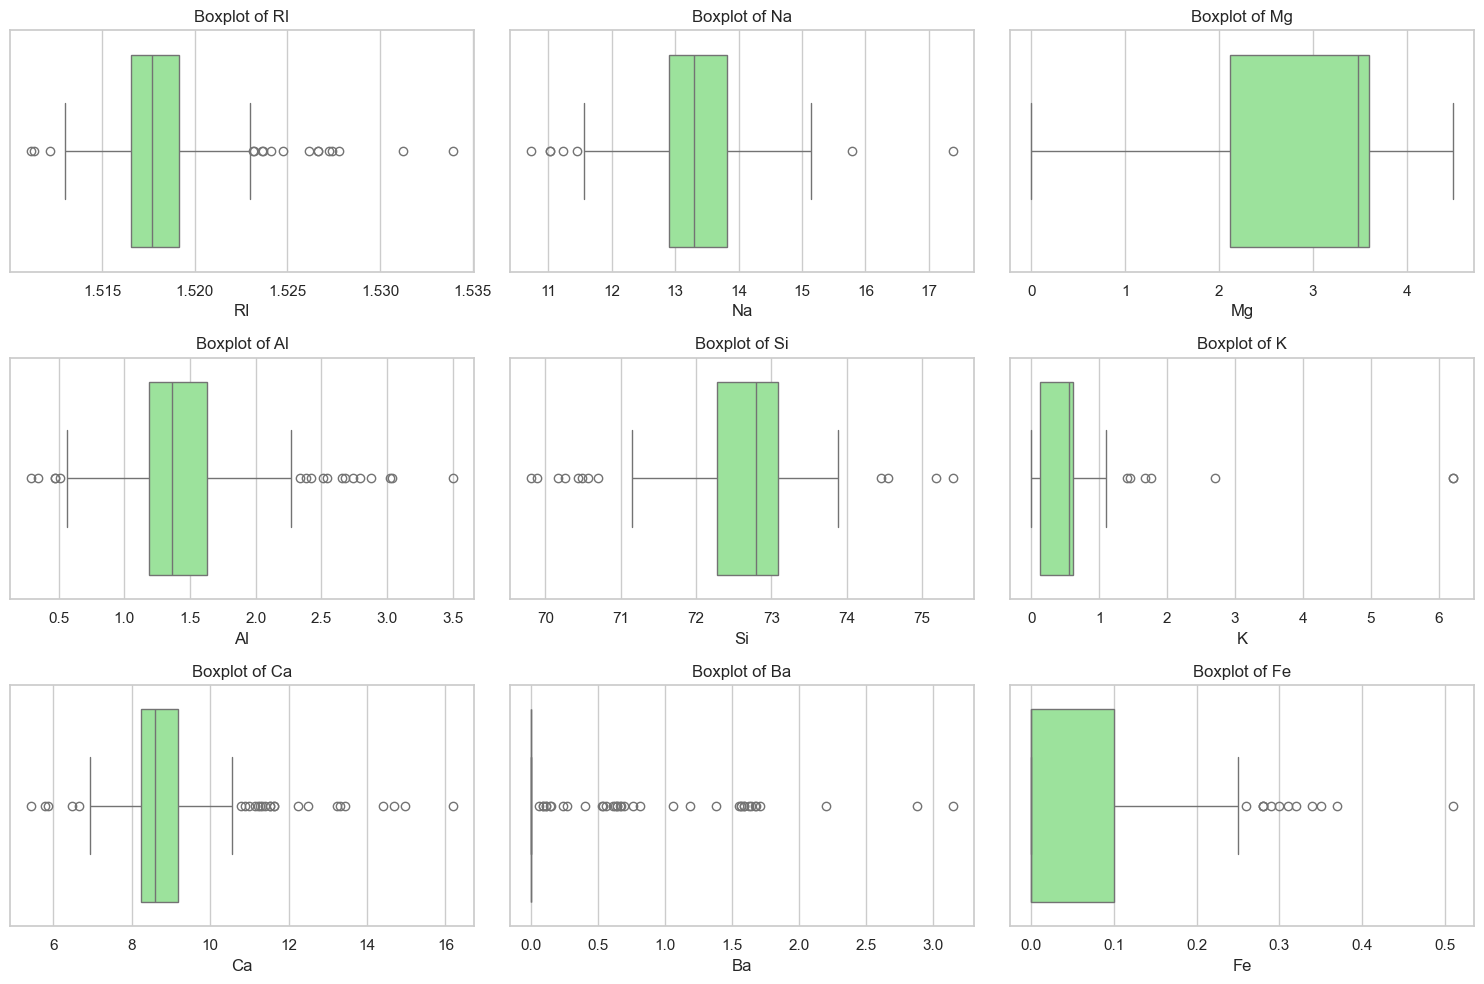

In [8]:
#Boxplots

# Box plots for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # exclude target column
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column], color="lightgreen")
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()


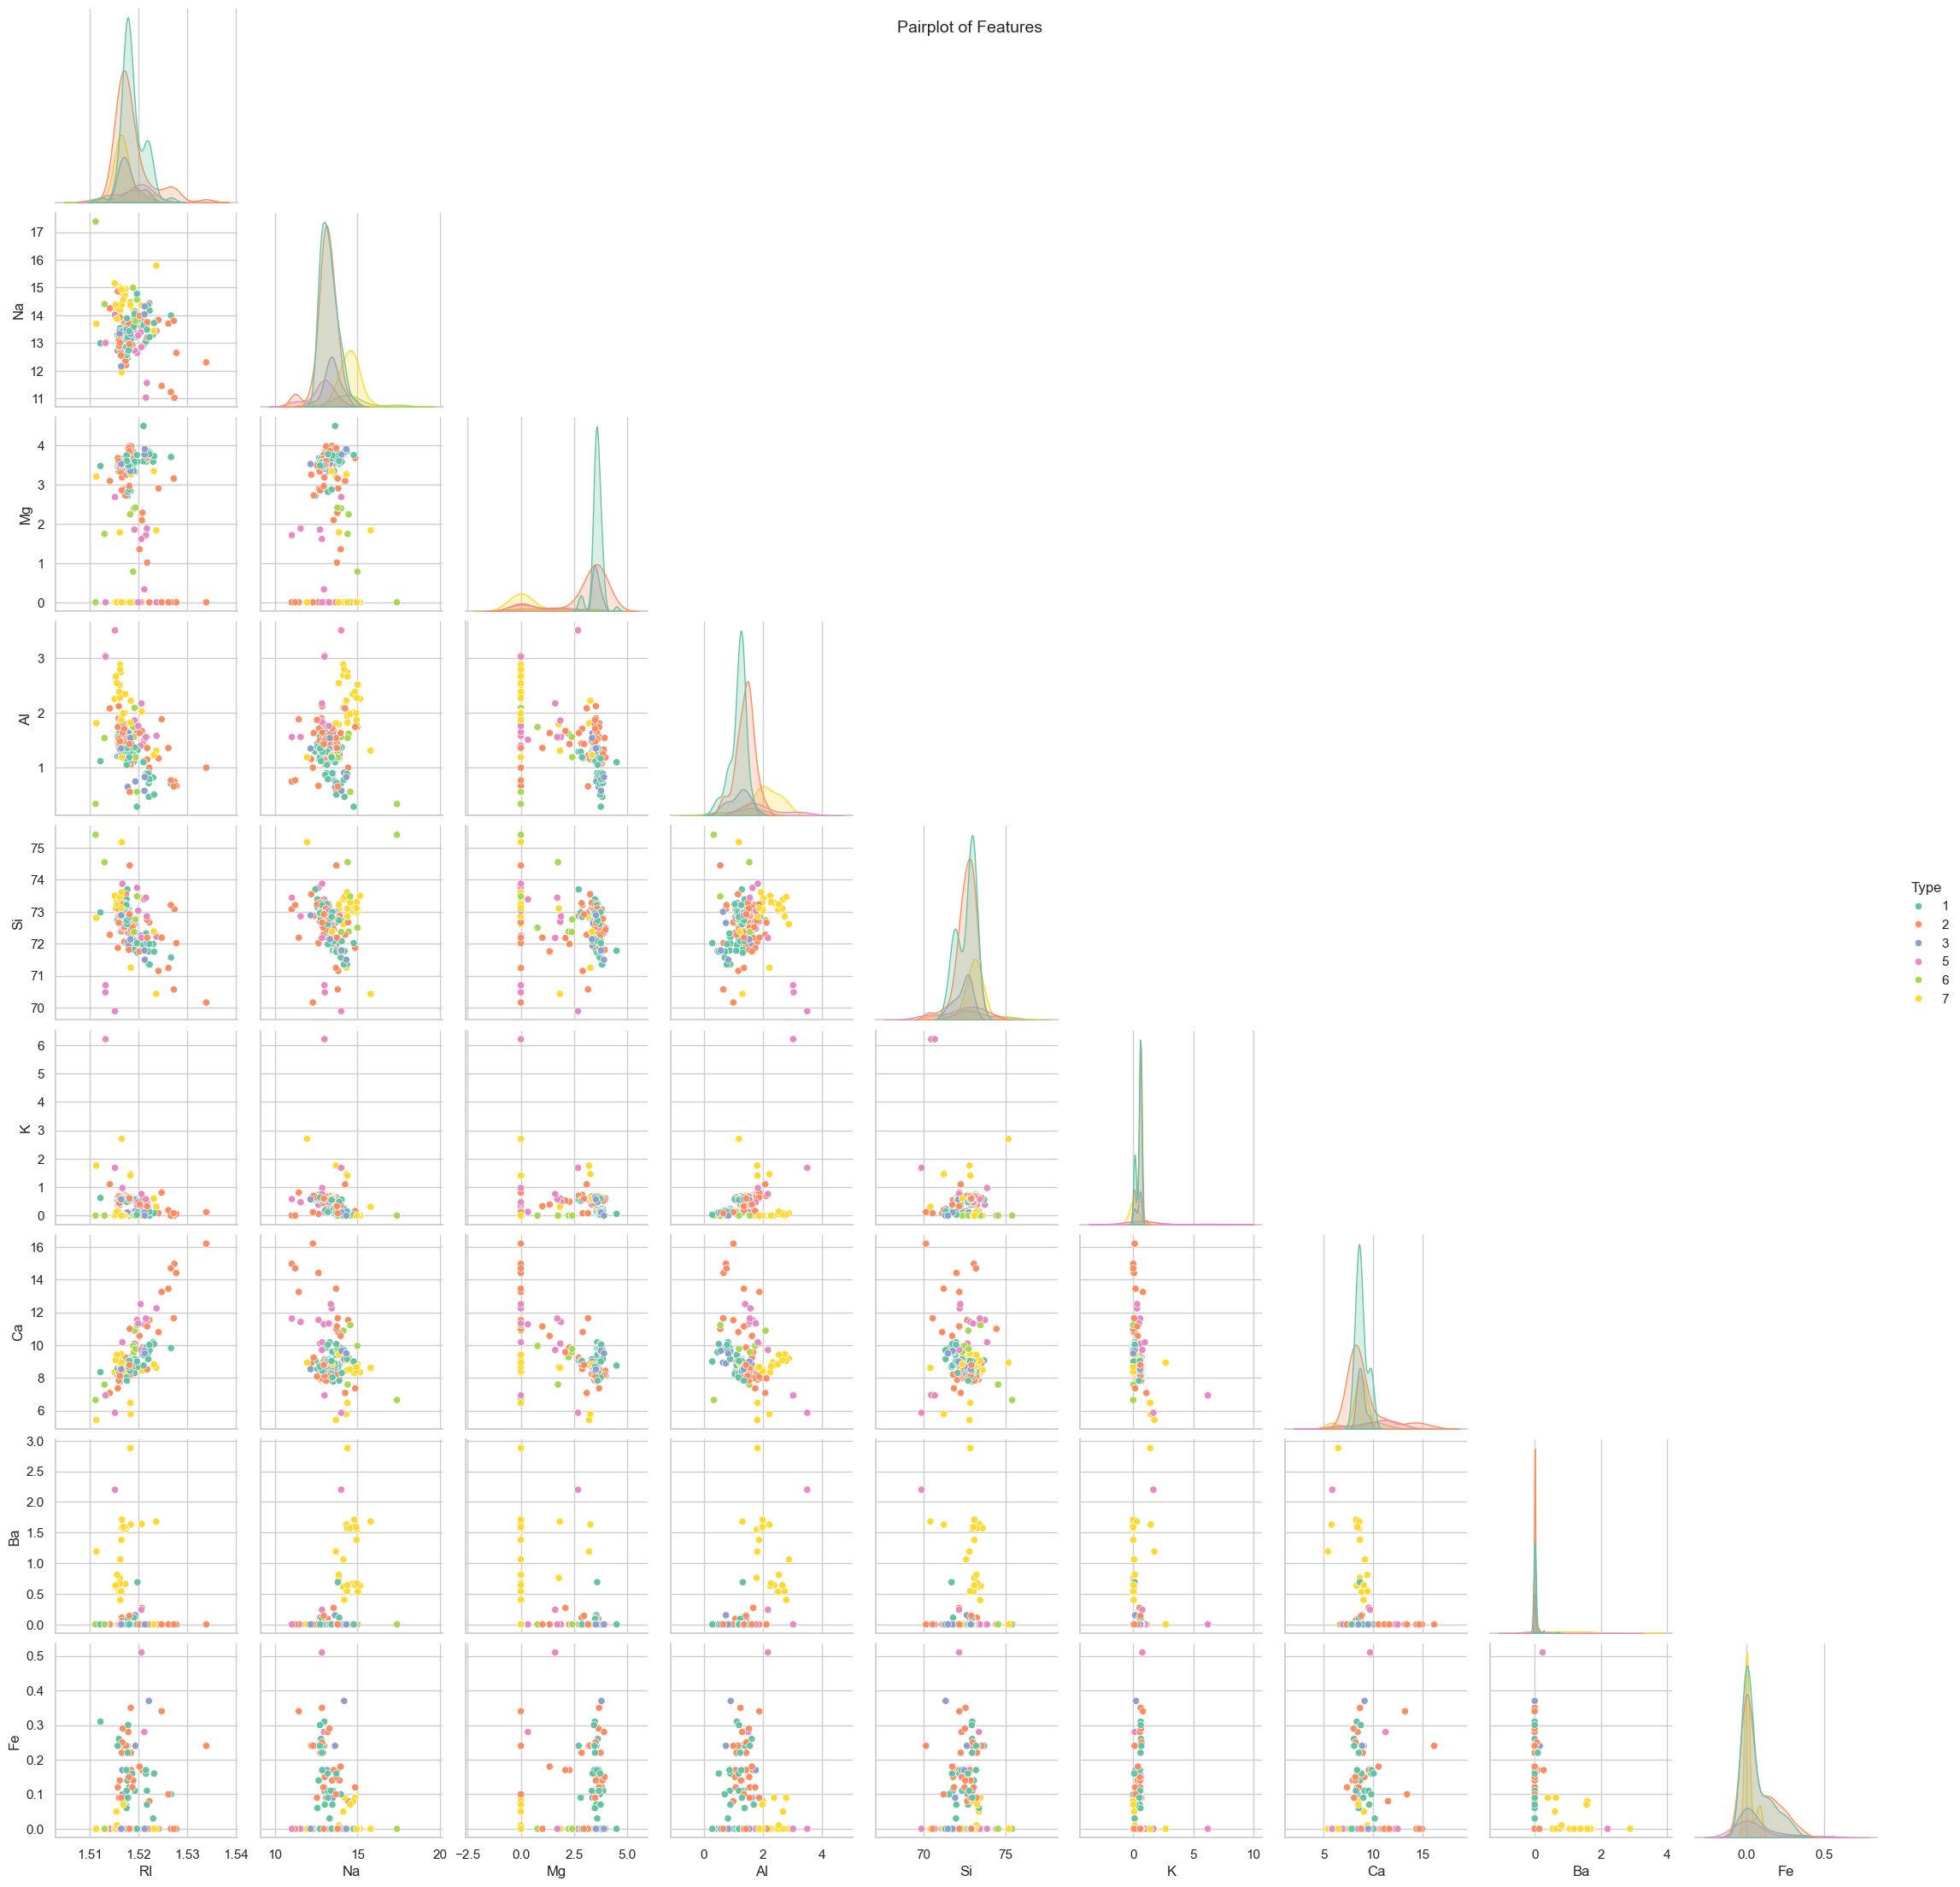

In [10]:
#pairplots
# To reduce clutter, we can sample the dataset
sample_df = df.sample(n=200, random_state=42)

# Pairplot with hue as the target variable (assuming 'Type' is the target)
sns.pairplot(sample_df, hue='Type', palette='Set2', corner=True)
plt.suptitle("Pairplot of Features", fontsize=14)
plt.show()


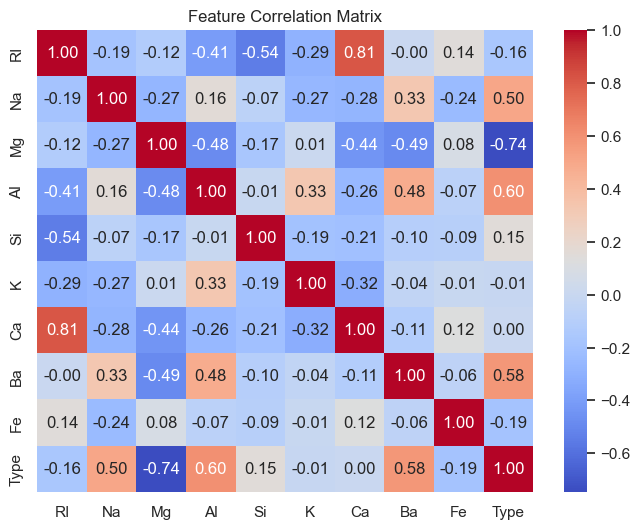

In [12]:
#Corelation heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

#Correlation heatmap of features . Note the strong RI–Ca correlation (0.81) and Type correlated positively with Al and Ba and negatively with Mg.

In [14]:
#Data Preprocessing

#Encoding :All features are numeric. The target Type is numeric-coded (1–7). We will treat it as a categorical class without further encoding.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into train (80%) and test (20%), stratified to preserve class ratios
X = df.drop('Type', axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Oversample minority classes to match the majority class size (here via random duplication)
# df_train = pd.DataFrame(X_train_scaled, columns=X.columns)
# df_train['Type'] = y_train.values
# target_counts = df_train['Type'].value_counts()
# max_count = target_counts.max()
# df_list = []
# for cls, count in target_counts.items():
#     df_cls = df_train[df_train['Type'] == cls]
#     if count < max_count:
#         df_cls_upsampled = df_cls.sample(max_count, replace=True, random_state=42)
#         df_list.append(df_cls_upsampled)
#     else:
#         df_list.append(df_cls)
# df_balanced = pd.concat(df_list).sample(frac=1, random_state=42)  # shuffle

# X_train_bal = df_balanced.drop('Type', axis=1).values
# y_train_bal = df_balanced['Type'].values
# print("Train class counts (post-oversample):", pd.Series(y_train_bal).value_counts().to_dict())

In [38]:
#Handling imbalanced data
from imblearn.over_sampling import SMOTE
# Check class distribution in training set
print("Train class counts (pre-SMOTE):", y_train.value_counts().to_dict())

# Apply SMOTE oversampling
smote = SMOTE(random_state=41)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)  # <-- Replaces manual oversampling

print("Train class counts (post-SMOTE):", pd.Series(y_train_bal).value_counts().to_dict())

Train class counts (pre-SMOTE): {2: 61, 1: 56, 7: 23, 3: 14, 5: 10, 6: 7}
Train class counts (post-SMOTE): {7: 61, 1: 61, 2: 61, 3: 61, 6: 61, 5: 61}


In [50]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predict on test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest Classification Report:

              precision    recall  f1-score   support

           1       0.75      0.64      0.69        14
           2       0.85      0.73      0.79        15
           3       0.33      0.67      0.44         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.77        43
   macro avg       0.77      0.84      0.79        43
weighted avg       0.80      0.77      0.78        43



In [53]:
#Bagging technique
from sklearn.ensemble import  BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(estimator=RandomForestClassifier(),  # can use any base learner
    n_estimators=100,
    bootstrap=True,           # sampling with replacement
    max_samples=1.0,          # use 100% of training set in each sample
    max_features=1.0,         # use all features (you can set <1.0 for RF-like)
    random_state=42)
bagging.fit(X_train_bal, y_train_bal)
bag_pred = bagging.predict(X_test_scaled)

# print("=== BaggingClassifier Results ===")
# print(classification_report(y_test, bag_pred))


In [48]:
#Boosting technique
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
adb = AdaBoostClassifier(n_estimators=100, random_state=41)
adb.fit(X_train_bal, y_train_bal)

# Predict on test set
y_pred_adb = adb.predict(X_test_scaled)

# Evaluate
# print("AdaBoost Classification Report:\n")
# print(classification_report(y_test, y_pred_adb, zero_division=0))


C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [54]:
#Comparing Bagging and Boosting Techniques

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {'Bagging': bag_pred, 'AdaBoost': y_pred_adb}
for name, y_pred in models.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name}: Accuracy={acc:.2f}, Precision={prec:.2f}, Recall={rec:.2f}, F1={f1:.2f}")

#Bagging clearly outperforms AdaBoost here (accuracy 0.74 vs 0.53, F1 ~0.76 vs 0.47).


Bagging: Accuracy=0.72, Precision=0.80, Recall=0.72, F1=0.73
AdaBoost: Accuracy=0.53, Precision=0.51, Recall=0.53, F1=0.47


In [56]:
#Interview Questions
#1. Bagging (e.g., Random Forest) trains multiple models in parallel on random data subsets and aggregates their predictions, reducing variance. 
    #Boosting (e.g., AdaBoost) builds models sequentially, focusing on errors to reduce bias. For imbalanced data, bagging (like Random Forest) often performs better due to its stability.

#2. Handling Imbalanced Data :Imbalanced datasets bias models toward majority classes. 
    #SMOTE (Synthetic Minority Oversampling) balances classes by generating synthetic minority samples instead of duplicating data, improving recall for rare classes without overfitting.